In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
def read_data():
    data_df = pd.read_csv('NetworkSecurityData.csv', index_col=0)
    data_df.index.name = 'No.'
    return data_df

In [3]:
data_df = read_data()
data_df

,Time,Source,Destination,Protocol,Length,Info
No.,,,,,,
1,0.000000,192.168.1.10,192.168.1.30,CIP,134,'HMI_PLANT_RESET' - Service (0x4d)
2,0.000001,192.168.1.10,192.168.1.30,CIP,124,'HMI_P3_PERMISSIVE' - Service (0x4c)
3,0.000002,192.168.1.10,192.168.1.30,TCP,128,"[TCP Retransmission] 55625 > 44818 [PSH, ACK..."
4,0.000003,192.168.1.30,192.168.1.100,CIP,280,Success: Service (0x4c)
5,0.000004,192.168.1.30,192.168.1.20,CIP,126,'HMI_P_NAOCL_UF_DUTY' - Service (0x4c)
...,...,...,...,...,...,...
149996,6.084269,192.168.1.200,192.168.1.219,TCP,74,"443 > 41002 [SYN, ACK] Seq=0 Ack=1 Win=8192 ..."
149997,6.084270,192.168.1.200,192.168.1.219,TCP,74,"443 > 41004 [SYN, ACK] Seq=0 Ack=1 Win=8192 ..."
149998,6.084271,192.168.1.200,192.168.1.219,TCP,78,"[TCP Out-Of-Order] 443 > 41002 [SYN, ACK] Se..."


In [4]:
def get_unique_col_values():
    source_ip = data_df['Source'].unique()
    destination_ip = data_df['Destination'].unique()
    protocol = data_df['Protocol'].unique()
    packet_length = data_df['Length'].unique()
    
    print("     §§§§§§§§§ BASIC DATA STATSTICS §§§§§§§§§§§§")
    print("--------------------------------------------------------")
    print('\nCount of source & destination ip address is = '+ str(len(source_ip)) +" & "+ str(len(destination_ip)))
    print('\nCount of Protocols exist in data are        = '+ str(len(protocol)))
    print('\nCount of packet length found in data is     = '+ str(len(packet_length)))
    
    print('---------------------------------------------------------')
    print('\nType of Protocols - \n', protocol)
    print('\nNo. of packets length - \n', packet_length)
    print('\nUnique source ip address are = \n', source_ip)
    print('\nUnique destination ip address are = \n', destination_ip)

In [5]:
get_unique_col_values()

     §§§§§§§§§ BASIC DATA STATSTICS §§§§§§§§§§§§
--------------------------------------------------------

Count of source & destination ip address is = 34 & 42

Count of Protocols exist in data are        = 13

Count of packet length found in data is     = 131
---------------------------------------------------------

Type of Protocols - 
 ['CIP' 'TCP' 'TLSv1' 'CIP CM' 'CIP I/O' 'TLSv1.2' 'SSH' 'SSDP' 'ARP'
 'ICMP' 'UDP' 'ENIP' 'GVCP']

No. of packets length - 
 [ 134  124  128  280  126  130  284   60   64  152  156  633  637  299
  303   66   70  132  460  464  264  268  144  423  148  427  146  150
  112  116   74   78   98  102  110  114   86   90  243  247  125  129
  104  108  138  142  136  140  118  122  120  416  420  407  411  195
  199  323  327  259  263  194  198  233  237  179  183  940  944  154
  279  283  106  439  443  441  445  523  527  139  143  174  178   94
  212  216  353  357  393  451  315  319  961  965  186  190  566  570
  528  532  502  506   62   82  689

In [6]:
def check_data_distribution():
    print(" §§§§§§§§ DATA DISTRIBUTION §§§§§§§§§§")
    print("---------------------------------------")
    
    print("\n ON BASIS OF PROTOCOL TYPE\n",data_df.Protocol.value_counts())
    print("---------------------------------------")
    print("\n ON BASIS OF PACKET LENGTH\n",data_df.Length.value_counts())
    print("---------------------------------------")
    print("\n ON BASIS OF SOURCE IP \n",data_df.Source.value_counts())
    print("---------------------------------------")
    print("\n ON BASIS OF DESTINATION IP \n",data_df.Destination.value_counts())
    print("---------------------------------------")
    print("\n ON BASIS OF INFO \n",data_df.Info.value_counts())

## DATA DISTRIBUTION ACROSS DIFFERENT VALUES 
From below method, top 3 protocols via which data is communicated is -
    
    TCP        95141
    CIP I/O    25320
    CIP        22188
    
Top packets are of length 64, 60, 86, 90, 116

    64      25084
    60      25084
    86       9030
    90       9010
    
Most communicated source and destination ip address is

     192.168.1.10         33219
     
For expermination, the info part was also explored. Apparently, there also seems to be lot of useful info which can be used. Such as, below are some of the top information message communicated. Mostly, which are related to HMI_PLANT, HMI_PLANT_AUTO or HMI_PLANT_RESET.

    'HMI_PLANT' - Service (0x4d)                                                       1184
    Success: 'HMI_PLANT' - Service (0x4d)                                              1183
    Success: 'HMI_PLANT_AUTO' - Service (0x4d)                                         1137
    'HMI_PLANT_RESET' - Service (0x4d)                                                 1133
    Success: 'HMI_PLANT_RESET' - Service (0x4d)                                        1131
    
The analysis derived from above code could be used later after streaming the data to do some transformation or analysis. Also, results could be visulaized on basis of these varying parameters.

In [50]:
check_data_distribution()

 §§§§§§§§ DATA DISTRIBUTION §§§§§§§§§§
---------------------------------------

 ON BASIS OF PROTOCOL TYPE
 TCP        95141
CIP I/O    25320
CIP        22188
TLSv1       5694
CIP CM      1486
SSH           74
ARP           32
ENIP          30
TLSv1.2       13
ICMP          12
SSDP           4
UDP            4
GVCP           2
Name: Protocol, dtype: int64
---------------------------------------

 ON BASIS OF PACKET LENGTH
 64      25084
60      25084
86       9030
90       9010
116      6147
        ...  
926         1
1313        1
714         1
451         1
353         1
Name: Length, Length: 131, dtype: int64
---------------------------------------

 ON BASIS OF SOURCE IP 
 192.168.1.10         33219
192.168.1.30         23296
192.168.1.20         20024
192.168.1.40         16128
192.168.1.50         13706
192.168.1.200        13665
192.168.1.60         11808
192.168.1.220         8478
192.168.1.219         8388
192.168.1.100          396
192.168.1.99           318
192.168.1.130   

## PLOT MAP OF SOURCE IP ADDRESS VS. RELATED PROTOCOLS

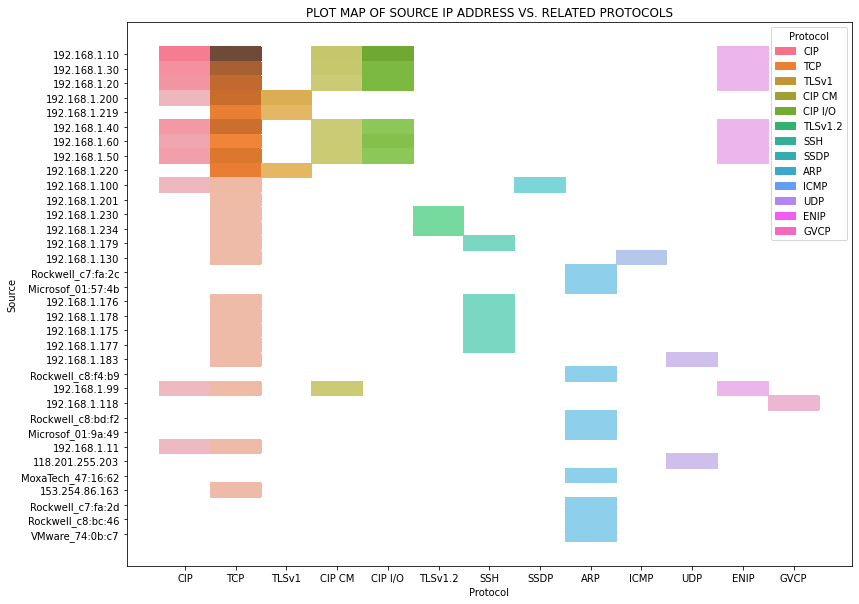

In [46]:
plt.figure(figsize=(13,10))
sns.histplot(data_df,x='Protocol',y='Source',hue='Protocol') 
plt.title('PLOT MAP OF SOURCE IP ADDRESS VS. RELATED PROTOCOLS')
plt.show()

## PLOT OF DATA TRANSMISSION FROM SOURCE IP ADDRESS OVER THE TIME IN RELATION TO PROTOCOLS

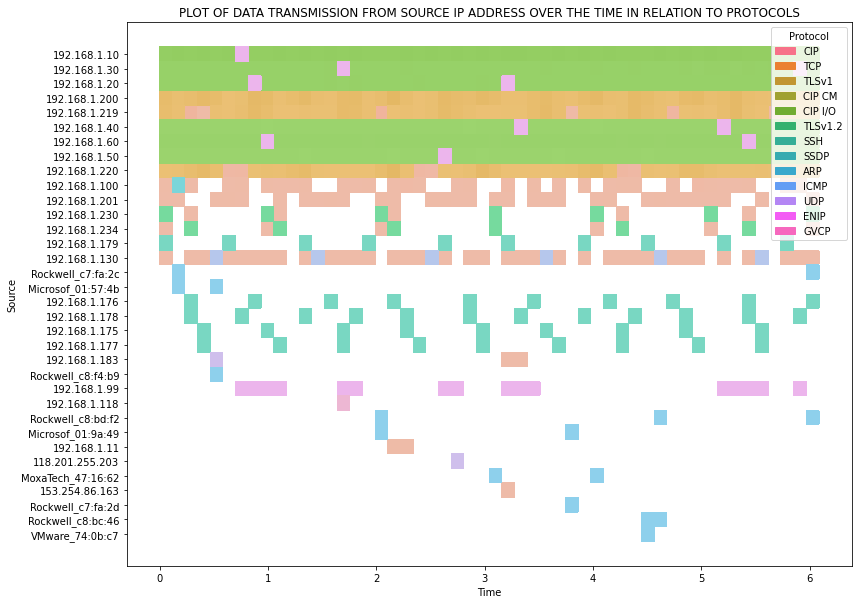

In [47]:
plt.figure(figsize=(13,10))
sns.histplot(data_df,x='Time',y='Source',hue='Protocol') 
plt.title('PLOT OF DATA TRANSMISSION FROM SOURCE IP ADDRESS OVER THE TIME IN RELATION TO PROTOCOLS')
plt.show()

## PLOT OF PACKET DATA LENGTHS TRANSMISSITED IN RELATION TO PROTOCOLS

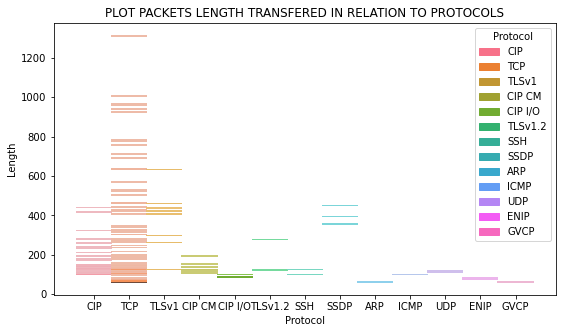

In [51]:
plt.figure(figsize=(9,5))
sns.histplot(data_df,x='Protocol',y='Length',hue='Protocol') 
plt.title('PLOT PACKETS LENGTH TRANSFERED IN RELATION TO PROTOCOLS')
plt.show()